# DSCI100 FINAL PROJECT

Name: Isabella Lin

# Introduction

**Background:**
- Minecraft, released in 2011 by the Swedish developer Mojang Studios, is a sandbox game that has become iconic among young audiences. As of 2025, it ranks as the third most popular video game worldwide (Wikipedia contributors, 2025).

- This study utilizes data collected by a research group in the UBC Computer Science department, led by Frank Wood. The team operated a dedicated Minecraft server and recorded detailed information on player activity as users interacted within the game environment. The dataset includes variables related to player skill levels, demographics, and gameplay sessions.

  
**Questions:**
- Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Specific question: Can a player's age and hours played predict whether they will subscribe to the game-related newsletter?



# Data Description of players.csv 

The datafile I used for answering the question was the `players.csv` which had a list of data of all unique players. This dataset contains the necessary variables to answer the question.

- Number of variables: 7
- Number of observations: 195


**ISSUES:**

- The `Age` variable is skewed toward younger players, with most ages clustered around 20. This may indicate a potential bias in the dataset.
- The `played_hours` variable contains many entries with zero hours and very small values. Converting this variable from hours to minutes could provide more meaningful insights in future analyses.
- There are numerous outliers in the `played_hours` data.
- Session counts are imbalanced: some players have participated in many sessions, while others have very few or none.

**Summary Table of `players.csv`**


| variable          | type      | meaning                                                                                                                        | # of missing observations | summary statistics (if applicable)                                             |
|-------------------|-----------|--------------------------------------------------------------------------------------------------------------------------------|--------------------------|--------------------------------------------------------------------------------|
| experience        | character | The level of experience of the player (Beginner (least experienced), Amateur, Regular, Veteran, Pro (most experienced))         | 0                        | N/A                                                                            |
| subscribe         | logical   | Whether subscribed to a game newsletter or not (True, or False)                                                                | 0                        | N/A                                                                            |
| hashedEmail       | character | Private personal Email information                                                                                              | 0                        | N/A                                                                            |
| played_hours      | double    | The number of hours played by the player (hours)                                                                               | 0                        | Max = 223.1, Min = 0, Mean = 5.845918, Standard Deviation = 28.35734           |
| name              | character | The player's name                                                                                                              | 0                        | N/A                                                                            |
| gender            | character | The player's gender (male, female, non-binary, agender, two-spirited, prefer not to say, other)                                | 0                        | N/A                                                                            |
| age               | double    | The player's age (years)                                                                                                       | 2                        | Max = 50, Min = 8, Mean = 20.52062, Median = 19, Mode = 17, SD = 6.174667      |

# Pre-Processing Data and Exploratory Visualization

In [1]:
#1 load the relevant R packages:
library(tidyverse)
library(tidymodels)
library(repr)
library(themis)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#2 loads data
minecraft_full<- read_csv("players.csv")
head(minecraft_full)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [ ]:
#3 wrangles and cleans the data to the format necessary for the planned analysis
minecraft<- minecraft_full|>
                   filter(!is.na(Age))|>
                   mutate(subscribe = as.factor(subscribe))

head(minecraft)

In [ ]:
#4 Summary statistics (mean values for each numerical variables)
players_average <- minecraft |>
                   summarize(min_played_hours = min(played_hours),
                             max_played_hours = max(played_hours),
                             average_played_hours = mean(played_hours),
                             min_age = min(Age),
                             max_age = max(Age),
                             median_age = median(Age),
                             mode_age = names(which.max(table(minecraft[[7]]))),
                             average_age = mean(Age))
players_average

**Statistics Interpretation**
- The maximum value for `played_hours` (223.1) is much higher than the average value (5.90), suggesting the presence of outliers in playtime.
- The mode of `age` is 17, likely because the Minecraft server automatically assigns 17 as the default age for each player. This default setting may have influenced the mode.
- The average age is about 20, which is reasonable since most research participants are university students.

In [ ]:
#5 splitting into training and testing datasets
set.seed(1)
players_split <- initial_split(minecraft, prop = 0.75, strata = subscribe)

players_training <- training(players_split)
players_testing <- testing(players_split)

In [ ]:
#6 create a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
# finding relationships predictor and variables 
#ie. Age+ Hours players as predictors and subscription status as variable
options(repr.plot.width = 8, repr.plot.height = 8)
Age_boxplot <- ggplot(players_training, aes(x = subscribe, y = Age, fill = subscribe)) +
               geom_boxplot() +
               labs(x= "Subscription Status", y= "Age of Player", fill = "Subscription\nStatus", title = "Figure 1: Age vs. Subscription Status")+
               theme(text = element_text(size = 15))
Age_boxplot

options(repr.plot.width = 8, repr.plot.height = 8)
played_hours_boxplot <- ggplot(players_training, aes(x = subscribe, y = played_hours, fill = subscribe)) +
                        geom_boxplot() +
                        scale_y_log10(labels=label_comma())+
                        labs(x = "Subscription Status", y = "Game Played Hours", fill = "Subscription\nStatus", title = "Figure 2: Played Hours vs. Subscription Status")+
                        theme(text = element_text(size = 15))
played_hours_boxplot

**Plot Descriptions:**

Figure 1.
- This pllot indicates that players who subscribe to game-related newsletters are generally younger, with a median age close to 17, while non-subscribers have a higher median age of about 22. Both groups display a similar range of age variation. Notably, there are four distinct outliers in the non-subscriber group with much higher ages. This pattern suggests that younger players are more inclined to subscribe to game-related newsletters.

Figure 2.
- This graph suggests a potential association between played hours and subscription status. The subscribed group exhibits a higher median number of played hours compared to the unsubscribed group. Additionally, the subscribed group displays greater variability in played hours, including a notably high outlier.

# Methods and Plan

***Method= KNN Classifcation***

**Why Choose This Method?**

Classification is appropriate for this predictive task because it involves using the variables `played_hours` and `Age` to predict the category `subscribe` for new samples. The K-Nearest Neighbors (KNN) algorithm is well-suited here since it does not require strict assumptions about the data distribution or shape. Instead, it classifies new samples based on their proximity to nearby data points.

**Model Application**

Model comparison and selection will be conducted through cross-validation. The `initial_split()` function is used to partition the dataset into 75% training and 25% testing sets, stratified by `subscribe` to maintain class balance. This ensures the testing data remains unseen during model training.

Cross-validation, typically with 5- or 10-folds, will assess the model’s performance, balancing accuracy and computational cost. Tuning the model to find the best K value will help maximize classification accuracy on new observations.

**Potential Limitations**

- KNN is sensitive to feature scaling. If `played_hours` and `Age` have vastly different ranges, Euclidean distance calculations may be biased toward the variable with the larger scale, leading to inaccurate neighbor selection and predictions.
- Class imbalance can affect KNN performance. If there are significantly more subscribed than unsubscribed cases, the model may overclassify new samples as subscribed, reducing prediction accuracy.


# Data Analysis

In [11]:
# 6. Preparing the recipe using only the training data. The data is standardized and upsampled to resolve data imbalance issues. 
players_recipe<- recipe(subscribe~Age+played_hours, data=players_training)|>
step_scale(all_predictors())|>
step_center(all_predictors()) |>
step_upsample(subscribe, over_ratio = 1)

In [16]:
# 7. a) Cross-validation and Parameter (K) Value Selection
players_vfold<- vfold_cv(players_training, v=5, strata=subscribe)
players_spec_tune<- nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

k_vals<- tibble(neighbors=seq(from=1, to=100, by=1))

player_tune_results<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec_tune)|>
tune_grid(resamples=players_vfold, grid=k_vals)|>
collect_metrics()

accuracy<- player_tune_results|>
filter(.metric=="accuracy")
     

[1] 97

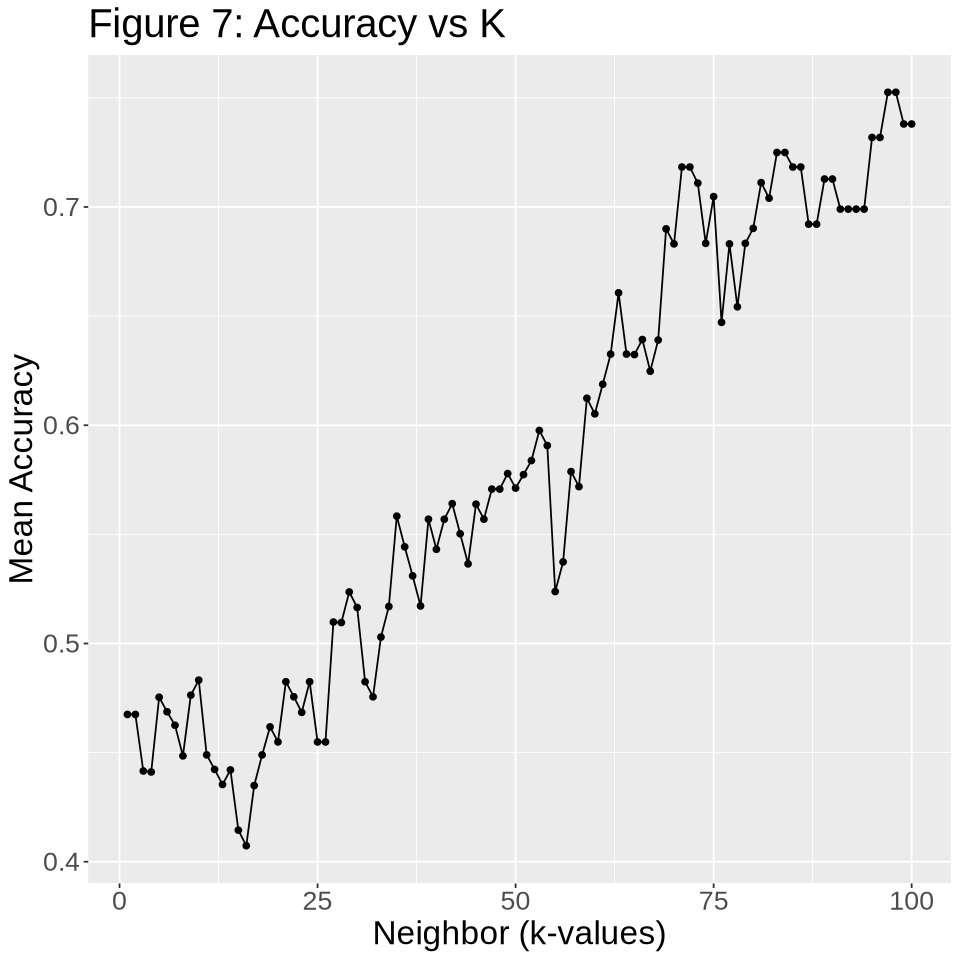

In [13]:
# 8. b) Best K value visualization and determination 
options(repr.plot.width = 8, repr.plot.height = 8)
accuracy_vis_k<- ggplot(accuracy, aes(x=neighbors, y=mean))+
geom_point()+
geom_line() +
labs(x = "Neighbor (k-values)",
     y = "Mean Accuracy",
     title = "Figure 7: Accuracy vs K")+
theme(text = element_text(size = 20))
accuracy_vis_k

best_k_val<- filter(accuracy, mean==max(mean)) |>
filter(neighbors == min(neighbors))|>
pull(neighbors)
best_k_val

In [18]:
# 8. a) Evaluate the tuned classifier on the testing data.
test_try_spec<- nearest_neighbor(weight_func = "rectangular", neighbors=best_k_val)|>
set_engine("kknn")|>
set_mode("classification")

test_fit<- workflow() |>
  add_recipe(players_recipe) |>
  add_model(test_try_spec) |>
  fit(data = players_training)

test_predictions <- predict(test_fit, players_testing) |>
  bind_cols(players_testing)

In [20]:
# 8. b) Assessing the estimated accuracy, precision and recall, and print a confusion matrix.

test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="second")

test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="second")
head(test_predictions)

confusion <- test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5102041


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7142857


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5555556


.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
FALSE,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
TRUE,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
TRUE,Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
FALSE,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
FALSE,Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22


          Truth
Prediction FALSE TRUE
     FALSE     5   16
     TRUE      8   20

# Discussion

***Result Summary***

**Accuracy = 0.53**

Our classifier achieved an accuracy of about 53%, correctly labeling 26 out of 49 observations. This level of accuracy is relatively low, as the model is only slightly better than random guessing at predicting the correct label.

**Precision = 0.724**

When the model predicts a subscription, it is accurate 72.4% of the time. This high precision suggests that although the model may overlook some subscribers, the predictions it does make are generally reliable. This is advantageous for efficient resource allocation by minimizing efforts spent on incorrect predictions.

**Recall = 0.583**

The model successfully identifies 58.3% of actual subscribers, missing more than 40% of them. This lower recall indicates that the model may underestimate the true number of subscribers, potentially leading to missed outreach opportunities or insufficient preparation for demand.

Overall, these results were expected given the limited sample size available for training the model. When working with a small dataset, the model has less information to learn from, which can restrict its ability to accurately capture the underlying patterns and relationships in the data. This often leads to lower overall accuracy, as well as challenges in balancing precision and recall effectively.

***Impact of these findings***

**1. Recruitment Efforts:**

Due to the model's low recall, it likely misses many potential subscribers. As a result, the research team may fail to engage enough participants or overlook valuable players who could enhance the study. Over time, this could lead to a smaller and less diverse player base, limiting the depth and variety of insights from the data.

**2. Resource Allocation (licenses, server capacity):**
With high precision, the model’s predictions of subscribers are generally accurate, allowing the team to confidently allocate licenses and server capacity for those users. However, since many actual subscribers might be missed, there remains a risk of unexpected demand from unpredicted players. Maintaining extra resources or a flexible infrastructure would help accommodate this uncertainty.


***Future Questions***

**Question 1**
Is it possible to imrpove recall without the sacrifice of precision? 
- This would invovlve adding more features (e.g. game behavior logs, type of activity in game, person's other hobbies etc.) or using more complex models.

**Question 2**


# References

Wikipedia contributors. (2025, April 2). Minecraft. In Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/w/index.php?title=Minecraft&oldid=1283605041